# Goodreads Recommendation & Rating Prediction

## Tahapan :
    1. Loading Libraries yang dibutuhkan
    2. Deskripsi singkat data dan Data Cleaning
    3. Visualisasi Data
    4. Recommendation
    5. Modelling
    6. Evaluasi

### 1. Loading Libraries

In [1]:
import numpy as np
import pandas as pd

### 2. Deskripsi Singkat Data dan Data Cleaning

In [2]:
books = pd.read_csv('datasets/good_reads.csv')

In [3]:
books.head()

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,publish_date,score
0,4.01,female,"historical-fiction,",74489,Victoria Thompson\n,/author/show/74489.Victoria_Thompson,74399,6268,United States\n,4.02,https://www.goodreads.com/book/show/686717.Mur...,686717,\n Murder on St. Mark's Place\n,Mystery,Historical,5260,375,277,2000,3230
1,4.15,male,"literature-fiction,mystery-thrillers,",706255,Stieg Larsson\n,/author/show/706255.Stieg_Larsson,3726435,142704,Sweden\n,4.13,https://www.goodreads.com/book/show/2429135.Th...,2429135,\n The Girl with the Dragon Tattoo\n,Fiction,Mystery,2229163,65227,465,August 2005,3062
2,4.00,female,"romance,",5618190,Mimi Jean Pamfiloff\n,/author/show/5618190.Mimi_Jean_Pamfiloff,76496,7975,United States\n,3.99,https://www.goodreads.com/book/show/27833684-t...,27833684,\n Tailored for Trouble\n,Romance,Contemporary,2151,391,354,2016,4585
3,3.88,male,"fiction,memoir,",37871,José Donoso\n,/author/show/37871.Jos_Donoso,5522,489,Chile\n,4.14,https://www.goodreads.com/book/show/382975.The...,382975,\n The Obscene Bird of Night\n,Fiction,Magical Realism,1844,173,438,1970,1533
4,4.10,female,"young-adult,fantasy,",36122,Patricia C. Wrede\n,/author/show/36122.Patricia_C_Wrede,291013,13453,United States\n,4.01,https://www.goodreads.com/book/show/64207.Sorc...,64207,\n Sorcery & Cecelia: or The Enchanted Ch...,Fantasy,Young Adult,17051,1890,326,April 15th 1988,2105


#### Menyatukan genre buku ke dalam 1 tabel, dan menjadikan list

In [4]:
book_genres=pd.DataFrame(data=books, columns=['genre_1','genre_2']) 

In [5]:
book_genres['combined']= book_genres.values.tolist()

In [6]:
book_genres

,genre_1,genre_2,combined
0,Mystery,Historical,"[Mystery, Historical]"
1,Fiction,Mystery,"[Fiction, Mystery]"
2,Romance,Contemporary,"[Romance, Contemporary]"
3,Fiction,Magical Realism,"[Fiction, Magical Realism]"
4,Fantasy,Young Adult,"[Fantasy, Young Adult]"
...,...,...,...
22886,Fantasy,Romance,"[Fantasy, Romance]"
22887,Romance,Fantasy,"[Romance, Fantasy]"
22888,Fantasy,Paranormal,"[Fantasy, Paranormal]"
22889,Fantasy,Paranormal,"[Fantasy, Paranormal]"


In [7]:
book_genres = book_genres.drop(['genre_1', 'genre_2'], axis=1)

In [8]:
book_genres

,combined
0,"[Mystery, Historical]"
1,"[Fiction, Mystery]"
2,"[Romance, Contemporary]"
3,"[Fiction, Magical Realism]"
4,"[Fantasy, Young Adult]"
...,...
22886,"[Fantasy, Romance]"
22887,"[Romance, Fantasy]"
22888,"[Fantasy, Paranormal]"
22889,"[Fantasy, Paranormal]"


#### Menggabungkan kolom baru yang sudah dibuat

In [9]:
books_join = pd.concat([books, book_genres], axis=1, join="inner")

In [10]:
books_join.head()

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,...,book_id,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,publish_date,score,combined
0,4.01,female,"historical-fiction,",74489,Victoria Thompson\n,/author/show/74489.Victoria_Thompson,74399,6268,United States\n,4.02,...,686717,\n Murder on St. Mark's Place\n,Mystery,Historical,5260,375,277,2000,3230,"[Mystery, Historical]"
1,4.15,male,"literature-fiction,mystery-thrillers,",706255,Stieg Larsson\n,/author/show/706255.Stieg_Larsson,3726435,142704,Sweden\n,4.13,...,2429135,\n The Girl with the Dragon Tattoo\n,Fiction,Mystery,2229163,65227,465,August 2005,3062,"[Fiction, Mystery]"
2,4.00,female,"romance,",5618190,Mimi Jean Pamfiloff\n,/author/show/5618190.Mimi_Jean_Pamfiloff,76496,7975,United States\n,3.99,...,27833684,\n Tailored for Trouble\n,Romance,Contemporary,2151,391,354,2016,4585,"[Romance, Contemporary]"
3,3.88,male,"fiction,memoir,",37871,José Donoso\n,/author/show/37871.Jos_Donoso,5522,489,Chile\n,4.14,...,382975,\n The Obscene Bird of Night\n,Fiction,Magical Realism,1844,173,438,1970,1533,"[Fiction, Magical Realism]"
4,4.10,female,"young-adult,fantasy,",36122,Patricia C. Wrede\n,/author/show/36122.Patricia_C_Wrede,291013,13453,United States\n,4.01,...,64207,\n Sorcery & Cecelia: or The Enchanted Ch...,Fantasy,Young Adult,17051,1890,326,April 15th 1988,2105,"[Fantasy, Young Adult]"


#### Mengganti judul kolom

In [11]:
renamed_genres = books_join.rename(columns={"combined": "book_genres"},inplace=True)

In [12]:
books_join = books_join.drop(['genre_1', 'genre_2'], axis=1)

In [13]:
books_join.head()

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,num_ratings,num_reviews,pages,publish_date,score,book_genres
0,4.01,female,"historical-fiction,",74489,Victoria Thompson\n,/author/show/74489.Victoria_Thompson,74399,6268,United States\n,4.02,https://www.goodreads.com/book/show/686717.Mur...,686717,\n Murder on St. Mark's Place\n,5260,375,277,2000,3230,"[Mystery, Historical]"
1,4.15,male,"literature-fiction,mystery-thrillers,",706255,Stieg Larsson\n,/author/show/706255.Stieg_Larsson,3726435,142704,Sweden\n,4.13,https://www.goodreads.com/book/show/2429135.Th...,2429135,\n The Girl with the Dragon Tattoo\n,2229163,65227,465,August 2005,3062,"[Fiction, Mystery]"
2,4.00,female,"romance,",5618190,Mimi Jean Pamfiloff\n,/author/show/5618190.Mimi_Jean_Pamfiloff,76496,7975,United States\n,3.99,https://www.goodreads.com/book/show/27833684-t...,27833684,\n Tailored for Trouble\n,2151,391,354,2016,4585,"[Romance, Contemporary]"
3,3.88,male,"fiction,memoir,",37871,José Donoso\n,/author/show/37871.Jos_Donoso,5522,489,Chile\n,4.14,https://www.goodreads.com/book/show/382975.The...,382975,\n The Obscene Bird of Night\n,1844,173,438,1970,1533,"[Fiction, Magical Realism]"
4,4.10,female,"young-adult,fantasy,",36122,Patricia C. Wrede\n,/author/show/36122.Patricia_C_Wrede,291013,13453,United States\n,4.01,https://www.goodreads.com/book/show/64207.Sorc...,64207,\n Sorcery & Cecelia: or The Enchanted Ch...,17051,1890,326,April 15th 1988,2105,"[Fantasy, Young Adult]"


In [14]:
books_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22891 entries, 0 to 22890
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   author_average_rating  22891 non-null  float64
 1   author_gender          22891 non-null  object 
 2   author_genres          22891 non-null  object 
 3   author_id              22891 non-null  int64  
 4   author_name            22891 non-null  object 
 5   author_page_url        22891 non-null  object 
 6   author_rating_count    22891 non-null  int64  
 7   author_review_count    22891 non-null  int64  
 8   birthplace             22891 non-null  object 
 9   book_average_rating    22891 non-null  float64
 10  book_fullurl           22891 non-null  object 
 11  book_id                22891 non-null  object 
 12  book_title             22891 non-null  object 
 13  num_ratings            22891 non-null  int64  
 14  num_reviews            22891 non-null  int64  
 15  pa

In [15]:
books_join.isnull().sum()

author_average_rating      0
author_gender              0
author_genres              0
author_id                  0
author_name                0
author_page_url            0
author_rating_count        0
author_review_count        0
birthplace                 0
book_average_rating        0
book_fullurl               0
book_id                    0
book_title                 0
num_ratings                0
num_reviews                0
pages                      0
publish_date             281
score                      0
book_genres                0
dtype: int64

#### Drop kolom 'publish date' karena terdapat data null, dan tidak akan digunakan untuk Analisa data selanjutnya

In [16]:
books_join = books_join.drop(['publish_date'], axis=1)

In [17]:
books_join.head()

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,num_ratings,num_reviews,pages,score,book_genres
0,4.01,female,"historical-fiction,",74489,Victoria Thompson\n,/author/show/74489.Victoria_Thompson,74399,6268,United States\n,4.02,https://www.goodreads.com/book/show/686717.Mur...,686717,\n Murder on St. Mark's Place\n,5260,375,277,3230,"[Mystery, Historical]"
1,4.15,male,"literature-fiction,mystery-thrillers,",706255,Stieg Larsson\n,/author/show/706255.Stieg_Larsson,3726435,142704,Sweden\n,4.13,https://www.goodreads.com/book/show/2429135.Th...,2429135,\n The Girl with the Dragon Tattoo\n,2229163,65227,465,3062,"[Fiction, Mystery]"
2,4.00,female,"romance,",5618190,Mimi Jean Pamfiloff\n,/author/show/5618190.Mimi_Jean_Pamfiloff,76496,7975,United States\n,3.99,https://www.goodreads.com/book/show/27833684-t...,27833684,\n Tailored for Trouble\n,2151,391,354,4585,"[Romance, Contemporary]"
3,3.88,male,"fiction,memoir,",37871,José Donoso\n,/author/show/37871.Jos_Donoso,5522,489,Chile\n,4.14,https://www.goodreads.com/book/show/382975.The...,382975,\n The Obscene Bird of Night\n,1844,173,438,1533,"[Fiction, Magical Realism]"
4,4.10,female,"young-adult,fantasy,",36122,Patricia C. Wrede\n,/author/show/36122.Patricia_C_Wrede,291013,13453,United States\n,4.01,https://www.goodreads.com/book/show/64207.Sorc...,64207,\n Sorcery & Cecelia: or The Enchanted Ch...,17051,1890,326,2105,"[Fantasy, Young Adult]"


In [18]:
books_join.sort_values('num_ratings', ascending=False).head(5)

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,num_ratings,num_reviews,pages,score,book_genres
13802,4.22,female,"literature-fiction,",1825,Harper Lee\n,/author/show/1825.Harper_Lee,4027504,108465,United States\n,4.27,https://www.goodreads.com/book/show/2657.To_Ki...,2657,\n To Kill a Mockingbird\n,3820921,81131,284,3918,"[Classics, Fiction]"
11862,4.22,female,"literature-fiction,",1825,Harper Lee\n,/author/show/1825.Harper_Lee,4025899,108409,United States\n,4.27,https://www.goodreads.com/book/show/2657.To_Ki...,2657,\n To Kill a Mockingbird\n,3819552,81102,324,17311,"[Classics, Fiction]"
6498,4.22,female,"literature-fiction,",1825,Harper Lee\n,/author/show/1825.Harper_Lee,4025899,108409,United States\n,4.27,https://www.goodreads.com/book/show/2657.To_Ki...,2657,\n To Kill a Mockingbird\n,3819418,81096,323,4272,"[Classics, Fiction]"
3042,4.22,female,"literature-fiction,",1825,Harper Lee\n,/author/show/1825.Harper_Lee,4025433,108392,United States\n,4.27,https://www.goodreads.com/book/show/2657.To_Ki...,2657,\n To Kill a Mockingbird\n,3819020,81079,324,19367,"[Classics, Fiction]"
797,4.22,female,"literature-fiction,",1825,Harper Lee\n,/author/show/1825.Harper_Lee,4024620,108376,United States\n,4.27,https://www.goodreads.com/book/show/2657.To_Ki...,2657,\n To Kill a Mockingbird\n,3818591,81069,324,77418,"[Classics, Fiction]"


#### karena terdapat banyak data duplicate dengan id buku yang sama, maka data duplikat tersebut dihilangkan untuk menghindari double counting

In [19]:
books_join.drop_duplicates(subset ="book_id", 
                     keep = 'first', inplace = True) 

In [20]:
books_join.head()

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,num_ratings,num_reviews,pages,score,book_genres
0,4.01,female,"historical-fiction,",74489,Victoria Thompson\n,/author/show/74489.Victoria_Thompson,74399,6268,United States\n,4.02,https://www.goodreads.com/book/show/686717.Mur...,686717,\n Murder on St. Mark's Place\n,5260,375,277,3230,"[Mystery, Historical]"
1,4.15,male,"literature-fiction,mystery-thrillers,",706255,Stieg Larsson\n,/author/show/706255.Stieg_Larsson,3726435,142704,Sweden\n,4.13,https://www.goodreads.com/book/show/2429135.Th...,2429135,\n The Girl with the Dragon Tattoo\n,2229163,65227,465,3062,"[Fiction, Mystery]"
2,4.00,female,"romance,",5618190,Mimi Jean Pamfiloff\n,/author/show/5618190.Mimi_Jean_Pamfiloff,76496,7975,United States\n,3.99,https://www.goodreads.com/book/show/27833684-t...,27833684,\n Tailored for Trouble\n,2151,391,354,4585,"[Romance, Contemporary]"
3,3.88,male,"fiction,memoir,",37871,José Donoso\n,/author/show/37871.Jos_Donoso,5522,489,Chile\n,4.14,https://www.goodreads.com/book/show/382975.The...,382975,\n The Obscene Bird of Night\n,1844,173,438,1533,"[Fiction, Magical Realism]"
4,4.10,female,"young-adult,fantasy,",36122,Patricia C. Wrede\n,/author/show/36122.Patricia_C_Wrede,291013,13453,United States\n,4.01,https://www.goodreads.com/book/show/64207.Sorc...,64207,\n Sorcery & Cecelia: or The Enchanted Ch...,17051,1890,326,2105,"[Fantasy, Young Adult]"


In [21]:
books_join.sort_values('num_ratings', ascending=False).head(5)

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,num_ratings,num_reviews,pages,score,book_genres
797,4.22,female,"literature-fiction,",1825,Harper Lee\n,/author/show/1825.Harper_Lee,4024620,108376,United States\n,4.27,https://www.goodreads.com/book/show/2657.To_Ki...,2657,\n To Kill a Mockingbird\n,3818591,81069,324,77418,"[Classics, Fiction]"
796,3.89,male,"fiction,short-stories,",3190,F. Scott Fitzgerald\n,/author/show/3190.F_Scott_Fitzgerald,3527100,77166,United States\n,3.91,https://www.goodreads.com/book/show/4671.The_G...,4671,\n The Great Gatsby\n,3202899,57834,180,32216,"[Classics, Fiction]"
3474,4.07,male,"literature-fiction,",1406384,John Green\n,/author/show/1406384.John_Green,5671653,323030,United States\n,4.24,https://www.goodreads.com/book/show/11870085-t...,11870085,\n The Fault in Our Stars\n,2946242,147696,313,13444,"[Young Adult, Fiction]"
3073,4.11,female,"fiction,romance,",1265,Jane Austen\n,/author/show/1265.Jane_Austen,5183376,141624,England\n,4.25,https://www.goodreads.com/book/show/1885.Pride...,1885,\n Pride and Prejudice\n,2504334,55312,279,2408,"[Classics, Fiction]"
11315,4.05,male,"fiction,politics,",3706,George Orwell\n,/author/show/3706.George_Orwell,5117329,113535,India\n,4.17,https://www.goodreads.com/book/show/40961427-1984,40961427,1984,2495963,55492,326,7841,"[Classics, Fiction]"


## 3. Visualisasi Data

#### Import library visualisasi

In [22]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

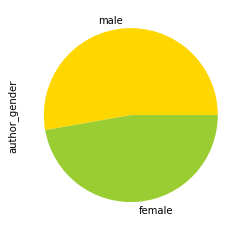

In [23]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
books_join['author_gender'].value_counts().head(10).plot(kind='pie', colors=colors_list)

In [24]:
books_join['author_gender'].value_counts()

male      8882
female    7948
Name: author_gender, dtype: int64

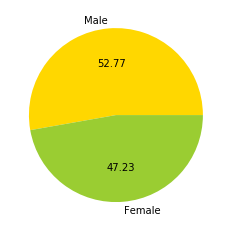

In [25]:
import matplotlib.pyplot as plt
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

plt.figure()
values = [8882, 7948] 
labels = ['Male', 'Female'] 
plt.pie(values, labels=labels, autopct='%.2f', colors=colors_list)
plt.show()

### Persentase pengarang wanita dan pria hampir setara jumlahnya

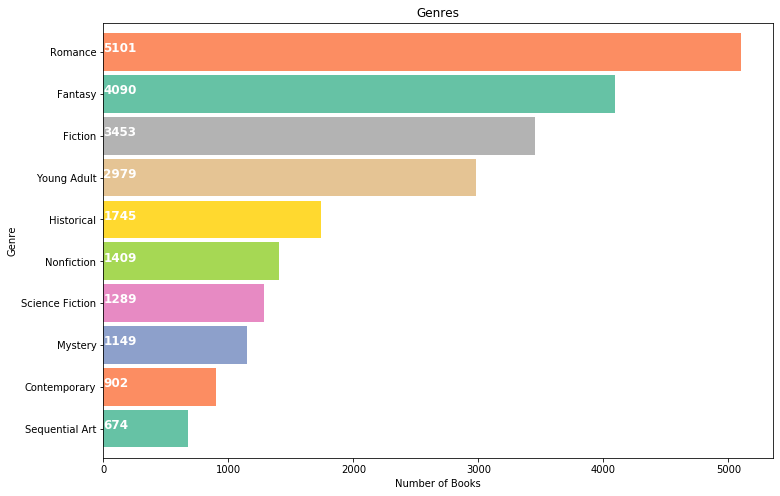

In [26]:
plt.subplots(figsize=(12,8))
list1 = []
for i in books_join['book_genres']:
    list1.extend(i)
ay = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette("Set2"))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ay.text(.8, i, v,fontsize=12,color='white',weight='bold')

plt.title('Genres')
plt.xlabel('Number of Books')
plt.ylabel('Genre')
plt.show()

### Genre buku paling banyak adalah romance, diikuti fantasi dan fiksi

In [27]:
booksjoin_popauthor = books_join.groupby('author_name')['author_rating_count'].sum()

In [28]:
booksjoin_popauthor

author_name
19                                   424
A.  Kirk\n                         16254
A. Digger Stolz\n                    637
A. Lee Martinez\n                  60542
A. Lynden Rolland\n                  280
                                   ...  
يحيى بن شرف النووي\n               11051
يحيى حقي\n                         18239
يوسف السباعي\n                    108261
يوسف زيدان\n                      310662
‎شروق إلهامى - Shrouk Elhamy\n       277
Name: author_rating_count, Length: 12152, dtype: int64

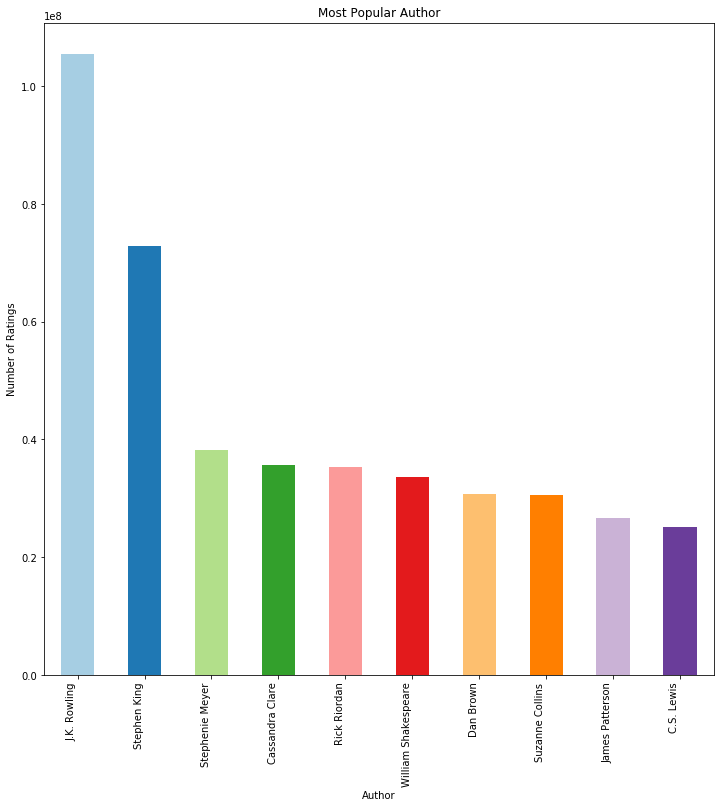

In [29]:
booksjoin_popauthor.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12, 12), 
                                                              color=sns.color_palette("Paired"))

plt.title('Most Popular Author')
plt.xlabel('Author')
plt.ylabel('Number of Ratings')
plt.show()

### Pengarang paling populer adalah JK Rowling (Harry Potter Series), diikuti Stephen King (The Shining, It, Carrie, dll) dan Stephenie Meyer (Twilight Series)

In [30]:
booksjoin_mostratedbooks = books_join.groupby('book_title')['num_ratings'].sum()

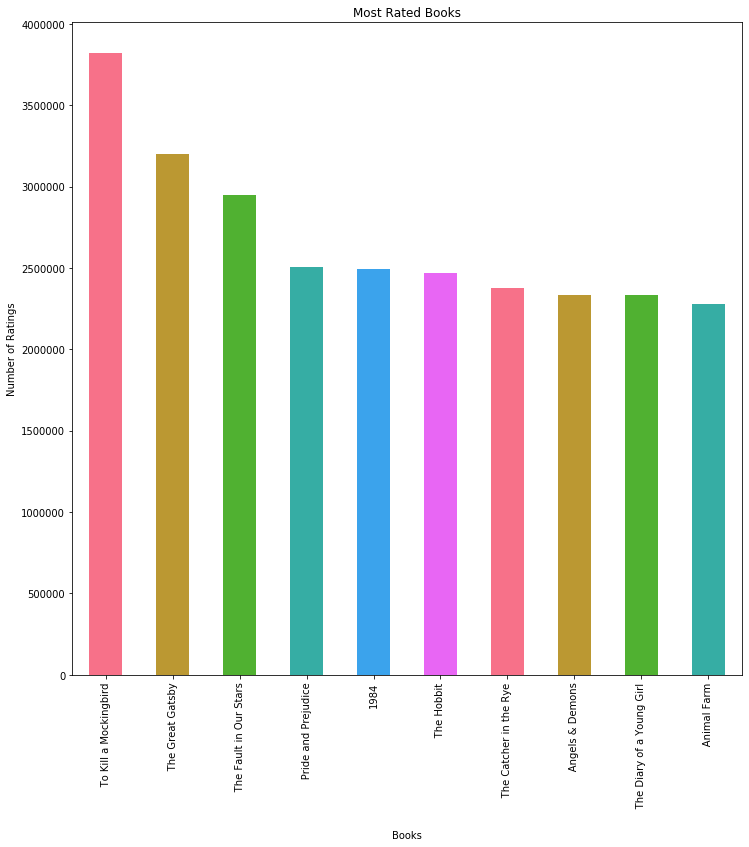

In [31]:
booksjoin_mostratedbooks.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12, 12), 
                                                              color=sns.color_palette("husl"))

plt.title('Most Rated Books')
plt.xlabel('Books')
plt.ylabel('Number of Ratings')
plt.show()

In [32]:
books_join.sort_values('num_ratings', ascending=False).head(3)

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,num_ratings,num_reviews,pages,score,book_genres
797,4.22,female,"literature-fiction,",1825,Harper Lee\n,/author/show/1825.Harper_Lee,4024620,108376,United States\n,4.27,https://www.goodreads.com/book/show/2657.To_Ki...,2657,\n To Kill a Mockingbird\n,3818591,81069,324,77418,"[Classics, Fiction]"
796,3.89,male,"fiction,short-stories,",3190,F. Scott Fitzgerald\n,/author/show/3190.F_Scott_Fitzgerald,3527100,77166,United States\n,3.91,https://www.goodreads.com/book/show/4671.The_G...,4671,\n The Great Gatsby\n,3202899,57834,180,32216,"[Classics, Fiction]"
3474,4.07,male,"literature-fiction,",1406384,John Green\n,/author/show/1406384.John_Green,5671653,323030,United States\n,4.24,https://www.goodreads.com/book/show/11870085-t...,11870085,\n The Fault in Our Stars\n,2946242,147696,313,13444,"[Young Adult, Fiction]"


### Buku paling banyak diberi rating / paling popular adalah To Kill a Mockingbird (Harper Lee), diikuti The Great Gatsby (F. Scott Fitzgerald), dan The Fault in Our Stars (John Green)

## 4. Recommendation

#### Membuat data yang dibutuhkan (genre buku dan genre pengarang) menjadi format list, diubah menjadi data binary 

In [33]:
for i,j in zip(books_join['book_genres'],books_join.index):
    list2=[]
    list2=i
    list2.sort()
    books_join.loc[j,'book_genres']=str(list2)
books_join['book_genres'] = books_join['book_genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
books_join['book_genres'] = books_join['book_genres'].str.split(',')

In [34]:
genreList = []
for index, row in books_join.iterrows():
    genres = row["book_genres"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
genreList[:10]

['Historical',
 'Mystery',
 'Fiction',
 'Contemporary',
 'Romance',
 'MagicalRealism',
 'Fantasy',
 'YoungAdult',
 'SequentialArt',
 'Nonfiction']

In [35]:
def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [36]:
books_join['book_genres_bin'] = books_join['book_genres'].apply(lambda x: binary(x))
books_join['book_genres_bin'].head()

0    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
Name: book_genres_bin, dtype: object

In [37]:
books_join

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,num_ratings,num_reviews,pages,score,book_genres,book_genres_bin
0,4.01,female,"historical-fiction,",74489,Victoria Thompson\n,/author/show/74489.Victoria_Thompson,74399,6268,United States\n,4.02,https://www.goodreads.com/book/show/686717.Mur...,686717,\n Murder on St. Mark's Place\n,5260,375,277,3230,"[Historical, Mystery]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,4.15,male,"literature-fiction,mystery-thrillers,",706255,Stieg Larsson\n,/author/show/706255.Stieg_Larsson,3726435,142704,Sweden\n,4.13,https://www.goodreads.com/book/show/2429135.Th...,2429135,\n The Girl with the Dragon Tattoo\n,2229163,65227,465,3062,"[Fiction, Mystery]","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,4.00,female,"romance,",5618190,Mimi Jean Pamfiloff\n,/author/show/5618190.Mimi_Jean_Pamfiloff,76496,7975,United States\n,3.99,https://www.goodreads.com/book/show/27833684-t...,27833684,\n Tailored for Trouble\n,2151,391,354,4585,"[Contemporary, Romance]","[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3.88,male,"fiction,memoir,",37871,José Donoso\n,/author/show/37871.Jos_Donoso,5522,489,Chile\n,4.14,https://www.goodreads.com/book/show/382975.The...,382975,\n The Obscene Bird of Night\n,1844,173,438,1533,"[Fiction, MagicalRealism]","[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4.10,female,"young-adult,fantasy,",36122,Patricia C. Wrede\n,/author/show/36122.Patricia_C_Wrede,291013,13453,United States\n,4.01,https://www.goodreads.com/book/show/64207.Sorc...,64207,\n Sorcery & Cecelia: or The Enchanted Ch...,17051,1890,326,2105,"[Fantasy, YoungAdult]","[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22885,4.09,female,"romance,",8386732,Victoria Zak\n,/author/show/8386732.Victoria_Zak,2835,449,\n,4.22,https://www.goodreads.com/book/show/23552511-h...,23552511,\n Highland Storm\n,319,44,232,1146,"[Romance, Romance]","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
22886,3.94,female,"humor-and-comedy,",108007,Dakota Cassidy\n,/author/show/108007.Dakota_Cassidy,52944,4558,\n,3.82,https://www.goodreads.com/book/show/24614174-g...,24614174,\n Gotta Have Faith\n,430,33,72,1215,"[Fantasy, Romance]","[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
22888,4.00,female,"romance,",6543639,Krystal Shannan\n,/author/show/6543639.Krystal_Shannan,15626,3530,United States\n,3.73,https://www.goodreads.com/book/show/35892811-m...,35892811,\n My Viking Vampire\n,2698,375,237,1679,"[Fantasy, Paranormal]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ..."
22889,4.20,female,"paranormal,",5246010,Bryce Evans\n,/author/show/5246010.Bryce_Evans,4689,828,\n,3.89,https://www.goodreads.com/book/show/17187320-t...,17187320,\n The Trinity\n,356,38,222,1897,"[Fantasy, Paranormal]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ..."


#### Merubah tipe data genre pengarang menjadi list

In [38]:
book_author_genres=pd.DataFrame(data=books_join, columns=['author_genres'])

In [39]:
book_author_genres['combined']= book_author_genres.values.tolist()

In [40]:
book_author_genres

,author_genres,combined
0,"historical-fiction,","[historical-fiction,]"
1,"literature-fiction,mystery-thrillers,","[literature-fiction,mystery-thrillers,]"
2,"romance,","[romance,]"
3,"fiction,memoir,","[fiction,memoir,]"
4,"young-adult,fantasy,","[young-adult,fantasy,]"
...,...,...
22885,"romance,","[romance,]"
22886,"humor-and-comedy,","[humor-and-comedy,]"
22888,"romance,","[romance,]"
22889,"paranormal,","[paranormal,]"


In [41]:
books_join = pd.concat([books_join, book_author_genres], axis=1, join="inner")

In [42]:
books_join.head()

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,...,book_id,book_title,num_ratings,num_reviews,pages,score,book_genres,book_genres_bin,author_genres,combined
0,4.01,female,"historical-fiction,",74489,Victoria Thompson\n,/author/show/74489.Victoria_Thompson,74399,6268,United States\n,4.02,...,686717,\n Murder on St. Mark's Place\n,5260,375,277,3230,"[Historical, Mystery]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","historical-fiction,","[historical-fiction,]"
1,4.15,male,"literature-fiction,mystery-thrillers,",706255,Stieg Larsson\n,/author/show/706255.Stieg_Larsson,3726435,142704,Sweden\n,4.13,...,2429135,\n The Girl with the Dragon Tattoo\n,2229163,65227,465,3062,"[Fiction, Mystery]","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","literature-fiction,mystery-thrillers,","[literature-fiction,mystery-thrillers,]"
2,4.00,female,"romance,",5618190,Mimi Jean Pamfiloff\n,/author/show/5618190.Mimi_Jean_Pamfiloff,76496,7975,United States\n,3.99,...,27833684,\n Tailored for Trouble\n,2151,391,354,4585,"[Contemporary, Romance]","[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","romance,","[romance,]"
3,3.88,male,"fiction,memoir,",37871,José Donoso\n,/author/show/37871.Jos_Donoso,5522,489,Chile\n,4.14,...,382975,\n The Obscene Bird of Night\n,1844,173,438,1533,"[Fiction, MagicalRealism]","[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","fiction,memoir,","[fiction,memoir,]"
4,4.10,female,"young-adult,fantasy,",36122,Patricia C. Wrede\n,/author/show/36122.Patricia_C_Wrede,291013,13453,United States\n,4.01,...,64207,\n Sorcery & Cecelia: or The Enchanted Ch...,17051,1890,326,2105,"[Fantasy, YoungAdult]","[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","young-adult,fantasy,","[young-adult,fantasy,]"


In [43]:
renamed_author_genres = books_join.rename(columns={"combined": "authors_genres"},inplace=True)

In [44]:
books_join.head()

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,...,book_id,book_title,num_ratings,num_reviews,pages,score,book_genres,book_genres_bin,author_genres,authors_genres
0,4.01,female,"historical-fiction,",74489,Victoria Thompson\n,/author/show/74489.Victoria_Thompson,74399,6268,United States\n,4.02,...,686717,\n Murder on St. Mark's Place\n,5260,375,277,3230,"[Historical, Mystery]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","historical-fiction,","[historical-fiction,]"
1,4.15,male,"literature-fiction,mystery-thrillers,",706255,Stieg Larsson\n,/author/show/706255.Stieg_Larsson,3726435,142704,Sweden\n,4.13,...,2429135,\n The Girl with the Dragon Tattoo\n,2229163,65227,465,3062,"[Fiction, Mystery]","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","literature-fiction,mystery-thrillers,","[literature-fiction,mystery-thrillers,]"
2,4.00,female,"romance,",5618190,Mimi Jean Pamfiloff\n,/author/show/5618190.Mimi_Jean_Pamfiloff,76496,7975,United States\n,3.99,...,27833684,\n Tailored for Trouble\n,2151,391,354,4585,"[Contemporary, Romance]","[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","romance,","[romance,]"
3,3.88,male,"fiction,memoir,",37871,José Donoso\n,/author/show/37871.Jos_Donoso,5522,489,Chile\n,4.14,...,382975,\n The Obscene Bird of Night\n,1844,173,438,1533,"[Fiction, MagicalRealism]","[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","fiction,memoir,","[fiction,memoir,]"
4,4.10,female,"young-adult,fantasy,",36122,Patricia C. Wrede\n,/author/show/36122.Patricia_C_Wrede,291013,13453,United States\n,4.01,...,64207,\n Sorcery & Cecelia: or The Enchanted Ch...,17051,1890,326,2105,"[Fantasy, YoungAdult]","[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","young-adult,fantasy,","[young-adult,fantasy,]"


In [45]:
books_join = books_join.drop(['author_genres'], axis=1)

In [46]:
books_join.head()

,author_average_rating,author_gender,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,num_ratings,num_reviews,pages,score,book_genres,book_genres_bin,authors_genres
0,4.01,female,74489,Victoria Thompson\n,/author/show/74489.Victoria_Thompson,74399,6268,United States\n,4.02,https://www.goodreads.com/book/show/686717.Mur...,686717,\n Murder on St. Mark's Place\n,5260,375,277,3230,"[Historical, Mystery]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[historical-fiction,]"
1,4.15,male,706255,Stieg Larsson\n,/author/show/706255.Stieg_Larsson,3726435,142704,Sweden\n,4.13,https://www.goodreads.com/book/show/2429135.Th...,2429135,\n The Girl with the Dragon Tattoo\n,2229163,65227,465,3062,"[Fiction, Mystery]","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[literature-fiction,mystery-thrillers,]"
2,4.00,female,5618190,Mimi Jean Pamfiloff\n,/author/show/5618190.Mimi_Jean_Pamfiloff,76496,7975,United States\n,3.99,https://www.goodreads.com/book/show/27833684-t...,27833684,\n Tailored for Trouble\n,2151,391,354,4585,"[Contemporary, Romance]","[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[romance,]"
3,3.88,male,37871,José Donoso\n,/author/show/37871.Jos_Donoso,5522,489,Chile\n,4.14,https://www.goodreads.com/book/show/382975.The...,382975,\n The Obscene Bird of Night\n,1844,173,438,1533,"[Fiction, MagicalRealism]","[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[fiction,memoir,]"
4,4.10,female,36122,Patricia C. Wrede\n,/author/show/36122.Patricia_C_Wrede,291013,13453,United States\n,4.01,https://www.goodreads.com/book/show/64207.Sorc...,64207,\n Sorcery & Cecelia: or The Enchanted Ch...,17051,1890,326,2105,"[Fantasy, YoungAdult]","[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[young-adult,fantasy,]"


#### Membuat data genre pengarang menjadi diubah menjadi data binary 

In [47]:
for i,j in zip(books_join['authors_genres'],books_join.index):
    list2=[]
    list2=i
    list2.sort()
    books_join.loc[j,'authors_genres']=str(list2)
books_join['authors_genres'] = books_join['authors_genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
books_join['authors_genres'] = books_join['authors_genres'].str.split(',')

In [48]:
authors_genresList = []
for index, row in books_join.iterrows():
    authors_genres = row["authors_genres"]
    
    for authors_genres in authors_genres:
        if authors_genres not in authors_genresList:
            authors_genresList.append(authors_genres)
authors_genresList[:10]

['historical-fiction',
 '',
 'literature-fiction',
 'mystery-thrillers',
 'romance',
 'fiction',
 'memoir',
 'young-adult',
 'fantasy',
 'horror']

In [49]:
def binary(authors_genres_list):
    binaryList = []
    
    for authors_genres in authors_genresList:
        if authors_genres in authors_genres_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [50]:
books_join['authors_genres_bin'] = books_join['authors_genres'].apply(lambda x: binary(x))
books_join['authors_genres_bin'].head()

0    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...
Name: authors_genres_bin, dtype: object

In [51]:
books_join.head()

,author_average_rating,author_gender,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,num_ratings,num_reviews,pages,score,book_genres,book_genres_bin,authors_genres,authors_genres_bin
0,4.01,female,74489,Victoria Thompson\n,/author/show/74489.Victoria_Thompson,74399,6268,United States\n,4.02,https://www.goodreads.com/book/show/686717.Mur...,686717,\n Murder on St. Mark's Place\n,5260,375,277,3230,"[Historical, Mystery]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[historical-fiction, ]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,4.15,male,706255,Stieg Larsson\n,/author/show/706255.Stieg_Larsson,3726435,142704,Sweden\n,4.13,https://www.goodreads.com/book/show/2429135.Th...,2429135,\n The Girl with the Dragon Tattoo\n,2229163,65227,465,3062,"[Fiction, Mystery]","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[literature-fiction, mystery-thrillers, ]","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,4.00,female,5618190,Mimi Jean Pamfiloff\n,/author/show/5618190.Mimi_Jean_Pamfiloff,76496,7975,United States\n,3.99,https://www.goodreads.com/book/show/27833684-t...,27833684,\n Tailored for Trouble\n,2151,391,354,4585,"[Contemporary, Romance]","[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[romance, ]","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3.88,male,37871,José Donoso\n,/author/show/37871.Jos_Donoso,5522,489,Chile\n,4.14,https://www.goodreads.com/book/show/382975.The...,382975,\n The Obscene Bird of Night\n,1844,173,438,1533,"[Fiction, MagicalRealism]","[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[fiction, memoir, ]","[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4.10,female,36122,Patricia C. Wrede\n,/author/show/36122.Patricia_C_Wrede,291013,13453,United States\n,4.01,https://www.goodreads.com/book/show/64207.Sorc...,64207,\n Sorcery & Cecelia: or The Enchanted Ch...,17051,1890,326,2105,"[Fantasy, YoungAdult]","[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[young-adult, fantasy, ]","[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ..."


#### Membuat pengelompokkan data buku berdasarkan genre buku dan genre pengarang

In [52]:
from scipy import spatial

def Similarity(booksId1, booksId2):
    a = books_join.iloc[booksId1]
    b = books_join.iloc[booksId2]
    
    genresA = a['book_genres_bin']
    genresB = b['book_genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    genres2A = a['authors_genres_bin']
    genres2B = b['authors_genres_bin']
    genres2Distance = spatial.distance.cosine(genres2A, genres2B)

    return genreDistance + genres2Distance

#### Tes nilai kesamaan antar 2 buku

In [53]:
Similarity(3,160)

1.6666666666666665

In [54]:
print(books_join.iloc[3])
print(books_join.iloc[160])

author_average_rating                                                 3.88
author_gender                                                         male
author_id                                                            37871
author_name                                                  José Donoso\n
author_page_url                              /author/show/37871.Jos_Donoso
author_rating_count                                                   5522
author_review_count                                                    489
birthplace                                                     Chile\n    
book_average_rating                                                   4.14
book_fullurl             https://www.goodreads.com/book/show/382975.The...
book_id                                                             382975
book_title                             \n      The Obscene Bird of Night\n
num_ratings                                                           1844
num_reviews              

### Nilai kesamaan jauh, karena Buku The Obscene Bird of Night (Fiction, Magical Realism, Memoir) dan Slave to Sensation (Fantasy, Romance) masuk ke dalam genre yang berbeda

#### Tes nilai kesamaan antar 2 buku lainnya

In [55]:
Similarity(797,796)

0.5917517095361369

In [56]:
print(books_join.iloc[797])
print(books_join.iloc[796])

author_average_rating                                                 4.22
author_gender                                                       female
author_id                                                             1825
author_name                                                   Harper Lee\n
author_page_url                               /author/show/1825.Harper_Lee
author_rating_count                                                4024620
author_review_count                                                 108376
birthplace                                             United States\n    
book_average_rating                                                   4.27
book_fullurl             https://www.goodreads.com/book/show/2657.To_Ki...
book_id                                                               2657
book_title                                 \n      To Kill a Mockingbird\n
num_ratings                                                        3818591
num_reviews              

### Nilai kesamaan dekat, karena Buku To Kill a Mockingbir (Classics, Fiction, Literature) dan The Great Gatsby (Classics, Fiction, Short Stories) masuk ke dalam genre yang sama

In [57]:
books_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16830 entries, 0 to 22890
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   author_average_rating  16830 non-null  float64
 1   author_gender          16830 non-null  object 
 2   author_id              16830 non-null  int64  
 3   author_name            16830 non-null  object 
 4   author_page_url        16830 non-null  object 
 5   author_rating_count    16830 non-null  int64  
 6   author_review_count    16830 non-null  int64  
 7   birthplace             16830 non-null  object 
 8   book_average_rating    16830 non-null  float64
 9   book_fullurl           16830 non-null  object 
 10  book_id                16830 non-null  object 
 11  book_title             16830 non-null  object 
 12  num_ratings            16830 non-null  int64  
 13  num_reviews            16830 non-null  int64  
 14  pages                  16830 non-null  object 
 15  sc

## 5.Modelling

#### Melakukan prediksi terhadap rating buku menggunakan regresi linear

In [58]:
books_join.head()

,author_average_rating,author_gender,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,num_ratings,num_reviews,pages,score,book_genres,book_genres_bin,authors_genres,authors_genres_bin
0,4.01,female,74489,Victoria Thompson\n,/author/show/74489.Victoria_Thompson,74399,6268,United States\n,4.02,https://www.goodreads.com/book/show/686717.Mur...,686717,\n Murder on St. Mark's Place\n,5260,375,277,3230,"[Historical, Mystery]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[historical-fiction, ]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,4.15,male,706255,Stieg Larsson\n,/author/show/706255.Stieg_Larsson,3726435,142704,Sweden\n,4.13,https://www.goodreads.com/book/show/2429135.Th...,2429135,\n The Girl with the Dragon Tattoo\n,2229163,65227,465,3062,"[Fiction, Mystery]","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[literature-fiction, mystery-thrillers, ]","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,4.00,female,5618190,Mimi Jean Pamfiloff\n,/author/show/5618190.Mimi_Jean_Pamfiloff,76496,7975,United States\n,3.99,https://www.goodreads.com/book/show/27833684-t...,27833684,\n Tailored for Trouble\n,2151,391,354,4585,"[Contemporary, Romance]","[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[romance, ]","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3.88,male,37871,José Donoso\n,/author/show/37871.Jos_Donoso,5522,489,Chile\n,4.14,https://www.goodreads.com/book/show/382975.The...,382975,\n The Obscene Bird of Night\n,1844,173,438,1533,"[Fiction, MagicalRealism]","[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[fiction, memoir, ]","[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4.10,female,36122,Patricia C. Wrede\n,/author/show/36122.Patricia_C_Wrede,291013,13453,United States\n,4.01,https://www.goodreads.com/book/show/64207.Sorc...,64207,\n Sorcery & Cecelia: or The Enchanted Ch...,17051,1890,326,2105,"[Fantasy, YoungAdult]","[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[young-adult, fantasy, ]","[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ..."


#### drop kolom yang tidak diperlukan, genre tidak berpengaruh terhadap rating sebuah buku

In [59]:
drop_columns = ["book_genres", "book_genres_bin", "authors_genres", "authors_genres_bin"]

In [60]:
books_join.drop(drop_columns, inplace=True, axis=1)

In [61]:
books_join.head()

,author_average_rating,author_gender,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,num_ratings,num_reviews,pages,score
0,4.01,female,74489,Victoria Thompson\n,/author/show/74489.Victoria_Thompson,74399,6268,United States\n,4.02,https://www.goodreads.com/book/show/686717.Mur...,686717,\n Murder on St. Mark's Place\n,5260,375,277,3230
1,4.15,male,706255,Stieg Larsson\n,/author/show/706255.Stieg_Larsson,3726435,142704,Sweden\n,4.13,https://www.goodreads.com/book/show/2429135.Th...,2429135,\n The Girl with the Dragon Tattoo\n,2229163,65227,465,3062
2,4.00,female,5618190,Mimi Jean Pamfiloff\n,/author/show/5618190.Mimi_Jean_Pamfiloff,76496,7975,United States\n,3.99,https://www.goodreads.com/book/show/27833684-t...,27833684,\n Tailored for Trouble\n,2151,391,354,4585
3,3.88,male,37871,José Donoso\n,/author/show/37871.Jos_Donoso,5522,489,Chile\n,4.14,https://www.goodreads.com/book/show/382975.The...,382975,\n The Obscene Bird of Night\n,1844,173,438,1533
4,4.10,female,36122,Patricia C. Wrede\n,/author/show/36122.Patricia_C_Wrede,291013,13453,United States\n,4.01,https://www.goodreads.com/book/show/64207.Sorc...,64207,\n Sorcery & Cecelia: or The Enchanted Ch...,17051,1890,326,2105


### memisahkan target dan feature, target yang akan diprediksi adalah rating buku

In [62]:
X=books_join.drop('book_average_rating',1)

#### drop kolom yang tidak diperlukan, seperti ID pengarang

In [63]:
X=X.drop('author_id',1)

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16830 entries, 0 to 22890
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   author_average_rating  16830 non-null  float64
 1   author_gender          16830 non-null  object 
 2   author_name            16830 non-null  object 
 3   author_page_url        16830 non-null  object 
 4   author_rating_count    16830 non-null  int64  
 5   author_review_count    16830 non-null  int64  
 6   birthplace             16830 non-null  object 
 7   book_fullurl           16830 non-null  object 
 8   book_id                16830 non-null  object 
 9   book_title             16830 non-null  object 
 10  num_ratings            16830 non-null  int64  
 11  num_reviews            16830 non-null  int64  
 12  pages                  16830 non-null  object 
 13  score                  16830 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 2.6+ 

In [65]:
y=books_join.book_average_rating

In [66]:
y.head()

0    4.02
1    4.13
2    3.99
3    4.14
4    4.01
Name: book_average_rating, dtype: float64

#### merubah tipe data object menjadi integer / binary

In [67]:
from sklearn import preprocessing

In [68]:
le = preprocessing.LabelEncoder()
X['book_title'] = le.fit_transform(X['book_title'])

In [69]:
X['author_name'] = le.fit_transform(X['author_name'])

In [70]:
X['author_gender'] = le.fit_transform(X['author_gender'])

In [71]:
X['pages'] = le.fit_transform(X['pages'])

In [72]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16830 entries, 0 to 22890
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   author_average_rating  16830 non-null  float64
 1   author_gender          16830 non-null  int32  
 2   author_name            16830 non-null  int32  
 3   author_page_url        16830 non-null  object 
 4   author_rating_count    16830 non-null  int64  
 5   author_review_count    16830 non-null  int64  
 6   birthplace             16830 non-null  object 
 7   book_fullurl           16830 non-null  object 
 8   book_id                16830 non-null  object 
 9   book_title             16830 non-null  int32  
 10  num_ratings            16830 non-null  int64  
 11  num_reviews            16830 non-null  int64  
 12  pages                  16830 non-null  int32  
 13  score                  16830 non-null  int64  
dtypes: float64(1), int32(4), int64(5), object(4)
memory us

#### drop kolom yang tidak diperlukan yang tidak terkait dengan prediksi rating, seperti tempat lahir pengarang, alamat web buku dan pengarang, ID buku

In [73]:
drop_columns = ["birthplace", "book_fullurl", "book_id", "author_page_url"]
X.drop(drop_columns, inplace=True, axis=1)

In [74]:
X.head()

,author_average_rating,author_gender,author_name,author_rating_count,author_review_count,book_title,num_ratings,num_reviews,pages,score
0,4.01,0,11633,74399,6268,7535,5260,375,296,3230
1,4.15,1,10779,3726435,142704,11972,2229163,65227,516,3062
2,4.00,0,8307,76496,7975,10508,2151,391,388,4585
3,3.88,1,5694,5522,489,12900,1844,173,485,1533
4,4.10,0,8915,291013,13453,10063,17051,1890,356,2105


#### melihat korelasi data yang digunakan

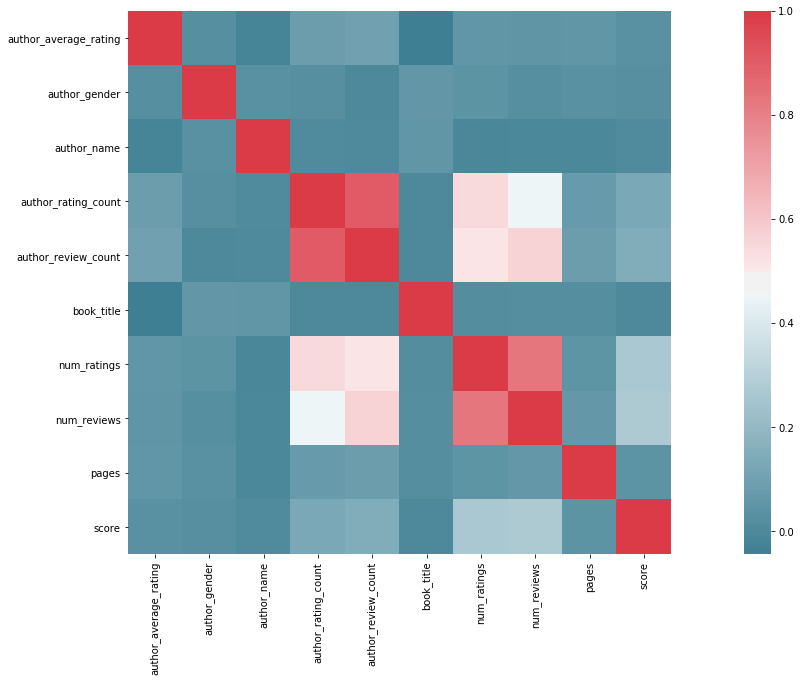

In [75]:
fig = plt.gcf()
fig.set_size_inches(26, 10)
corr = X.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

### modelling data dengan linear regression, dikarenakan menggunakan data author rating count, author review count, num ratings dan num reviews, diperkirakan seiring dengan kenaikan data tersebut berpengaruh linear dengan kenaikan rating buku

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
predictions = lr.predict(X_test)

In [81]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,3.10,3.174219
1,3.84,3.790018
2,3.91,3.893488
3,3.75,3.760347
4,4.31,3.852846
5,3.77,3.765577
6,3.64,3.664930
7,3.96,4.006717
8,4.26,4.166347
9,3.87,3.833748


### hasil data prediksi mendekati data sebenarnya

## 6. Evaluasi

In [82]:
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics

In [83]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.12435155400462118
MSE: 0.03495765066036394
RMSE: 0.18696965170947916


#### metode yang digunakan adalah error

### atribut yang paling penting saat melakukan prediksi rating adalah author rating count, author review count, num ratings dan num reviews